In [1]:
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from graphviz import Source
import numpy as np

In [2]:
path = 'D:\\桌面\\Train_Mould\\0813'
SavePath = 'D:\\桌面\\Pred_Data_without_hand'
file_list = os.listdir(path)
file_list

['json_Combine_txt_ToCSV_0819.csv',
 'json_Combine_txt_ToCSV_0820.csv',
 'json_Combine_txt_ToCSV_0821.csv',
 'json_Combine_txt_ToCSV_0822.csv',
 'json_Combine_txt_ToCSV_0823.csv',
 'json_Combine_txt_ToCSV_0824.csv',
 'json_Combine_txt_ToCSV_0825.csv',
 'json_Combine_txt_ToCSV_0826.csv',
 'json_Combine_txt_ToCSV_0827.csv',
 'json_Combine_txt_ToCSV_0828.csv',
 'json_Combine_txt_ToCSV_0829.csv',
 'json_Combine_txt_ToCSV_0830.csv',
 'json_Combine_txt_ToCSV_0831.csv',
 'json_Combine_txt_ToCSV_0901.csv',
 'json_Combine_txt_ToCSV_0902.csv',
 'json_Combine_txt_ToCSV_0903.csv',
 'json_Combine_txt_ToCSV_0904.csv',
 'json_Combine_txt_ToCSV_0905.csv',
 'json_Combine_txt_ToCSV_0906.csv',
 'json_Combine_txt_ToCSV_0907.csv',
 'json_Combine_txt_ToCSV_0908.csv',
 'json_Combine_txt_ToCSV_0909.csv',
 'json_Combine_txt_ToCSV_0910.csv',
 'json_Combine_txt_ToCSV_0911.csv',
 'json_Combine_txt_ToCSV_0912.csv',
 'json_Combine_txt_ToCSV_0913.csv']

In [3]:
df_train_data = pd.read_csv('Data_without_hand.csv')
df_train_data

,Unnamed: 0,Timestamp,Z1_mean,Z1_max,Z1_min,Z1_std,Z1_skew,Z1_kurtosis,Z1_peakTopeak,Z1_RMS,...,energy_Signal,spectrum_Mean,spectrum_Std,spectrum_Skew,spectrum_Kur,machine_Status_max,Temperature_avg,Current_avg,Current_max,Mould_life
0,0,2020/8/6 00:00,0.169920,0.632324,-0.288086,0.056986,0.097843,11.729121,0.920410,0.180677,...,0.029397,84.233139,44.447411,0.761343,2.318339,0.0,35.10,0.0,0,3
1,1,2020/8/6 00:01,0.171129,0.625000,-0.272217,0.054116,0.380044,12.547399,0.897217,0.181634,...,0.030063,83.329951,44.350078,1.070229,9.460321,0.0,35.10,0.0,0,3
2,2,2020/8/6 00:02,0.171056,0.611572,-0.272217,0.054945,0.275383,13.143974,0.883789,0.180369,...,0.029514,81.881146,42.844147,0.623316,0.193594,0.0,35.10,0.0,0,3
3,3,2020/8/6 00:03,0.169828,0.572510,-0.267334,0.057269,0.091348,10.469897,0.839844,0.180933,...,0.029457,84.110317,44.383147,0.848372,3.779865,0.0,35.05,0.0,0,3
4,4,2020/8/6 00:04,0.171111,0.588379,-0.280762,0.053189,0.408062,13.450596,0.869141,0.180843,...,0.029875,81.116312,42.184946,0.705754,0.450981,0.0,35.00,0.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,4315,2020/8/10 23:55,0.170821,0.588379,-0.324707,0.060303,0.183394,12.013803,0.913086,0.181652,...,0.029361,83.427368,44.195855,0.848823,3.866838,0.0,32.10,0.0,0,3
4316,4316,2020/8/10 23:56,0.169787,0.609131,-0.295410,0.056697,0.014228,13.596269,0.904541,0.180940,...,0.029525,82.993970,43.144514,0.636500,0.255950,0.0,32.10,0.0,0,3
4317,4317,2020/8/10 23:57,0.169809,0.643311,-0.306396,0.057768,0.104474,13.318270,0.949707,0.181319,...,0.029539,86.754612,46.744344,3.222564,97.829940,0.0,32.10,0.0,0,3
4318,4318,2020/8/10 23:58,0.169682,0.590820,-0.280762,0.055091,0.350928,11.642591,0.871582,0.180582,...,0.029575,87.202848,46.900836,2.253464,54.019154,0.0,32.10,0.0,0,3


In [4]:
df_train_data.columns

Index(['Unnamed: 0', 'Timestamp', 'Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std',
       'Z1_skew', 'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur', 'machine_Status_max', 'Temperature_avg', 'Current_avg',
       'Current_max', 'Mould_life'],
      dtype='object')

In [5]:
X = df_train_data[['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std',
       'Z1_skew', 'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur','machine_Status_max', 'Temperature_avg', 'Current_avg',
       'Current_max']]
y = df_train_data['Mould_life']

In [6]:
params = { 'max_depth': 8,'max_leaf_nodes':5}

In [7]:
xgbClf = XGBClassifier(params)

In [8]:
xgbClf.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
xgbClf.score(X,y)

1.0

In [10]:
# print(xgbClf.feature_importances_)

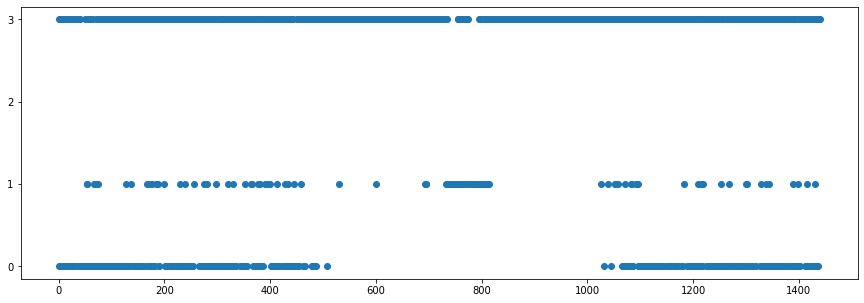

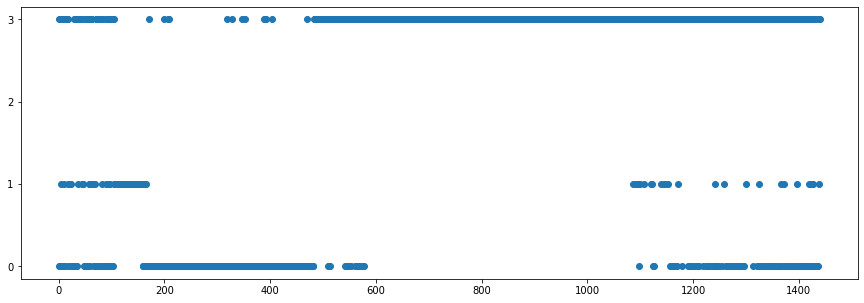

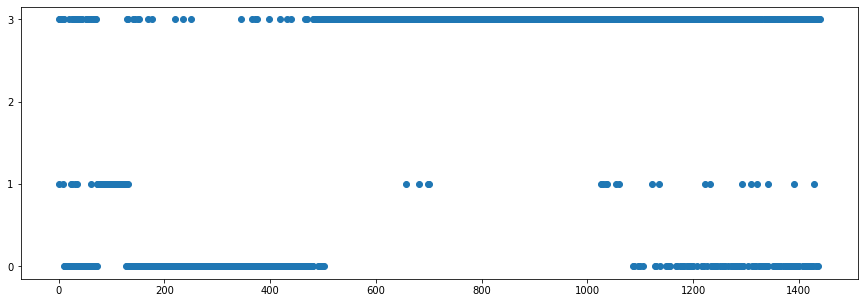

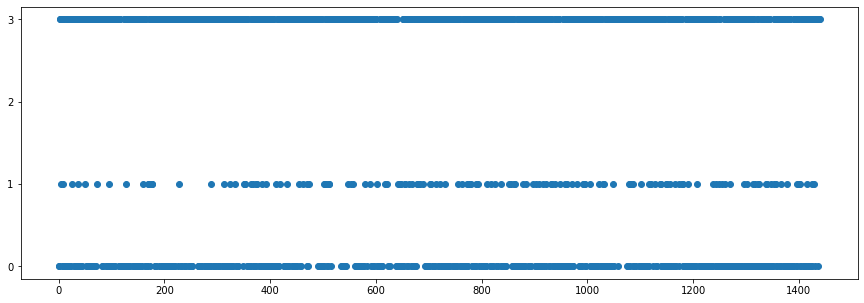

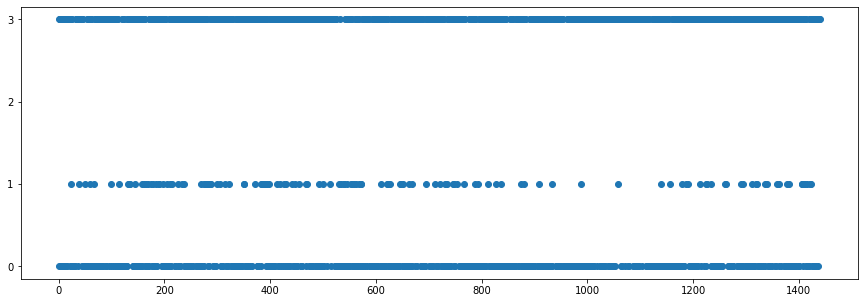

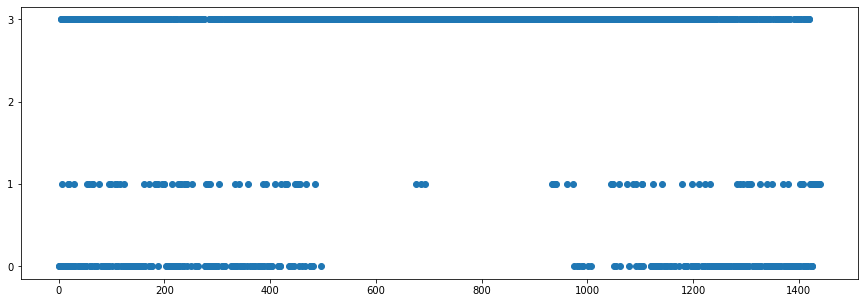

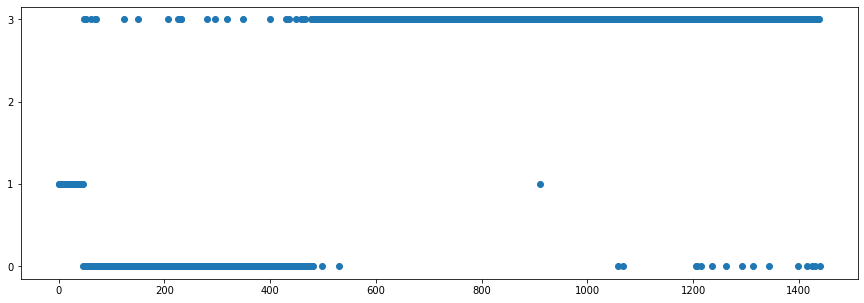

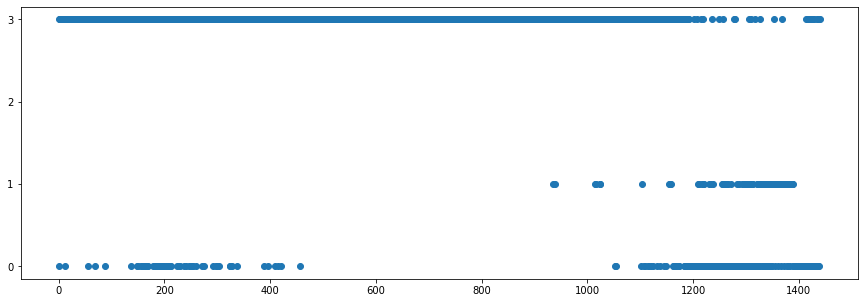

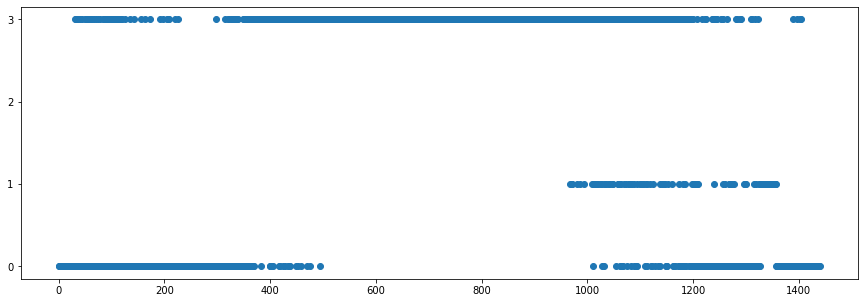

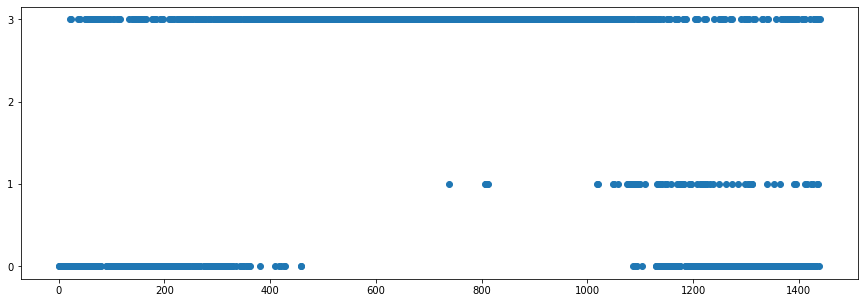

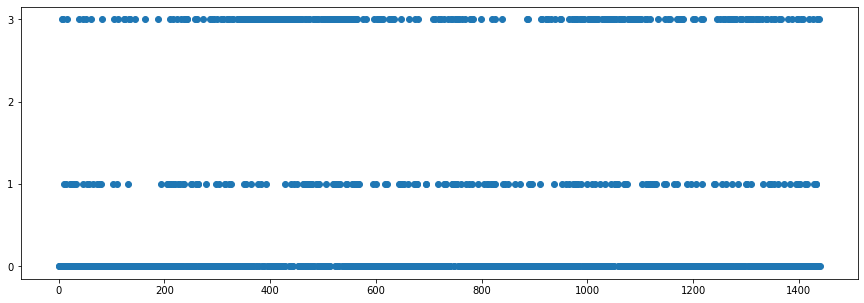

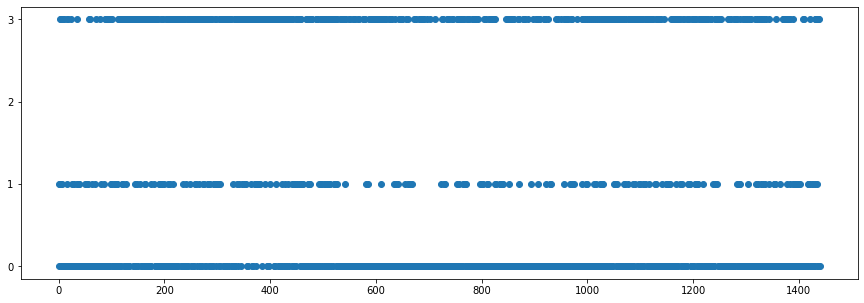

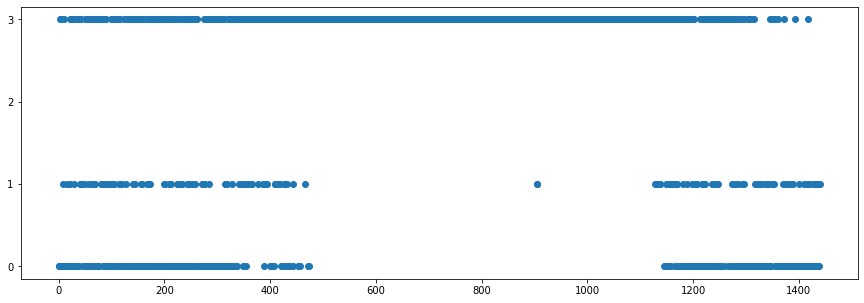

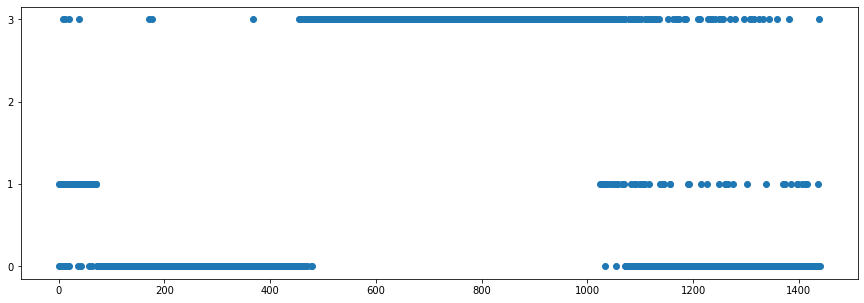

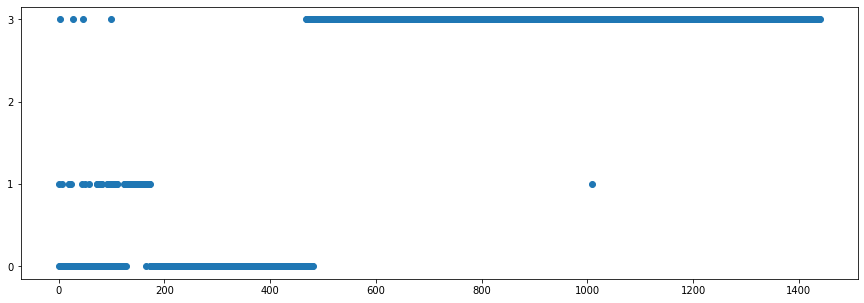

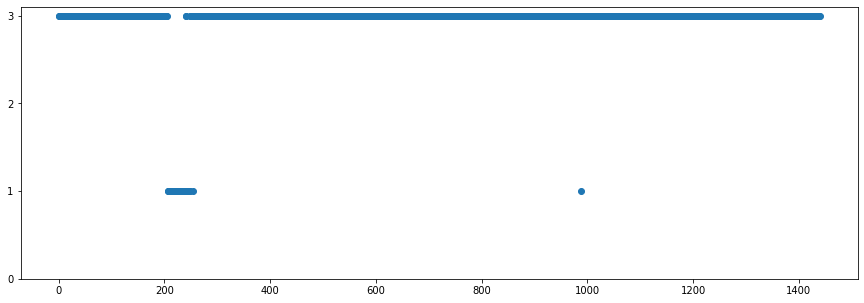

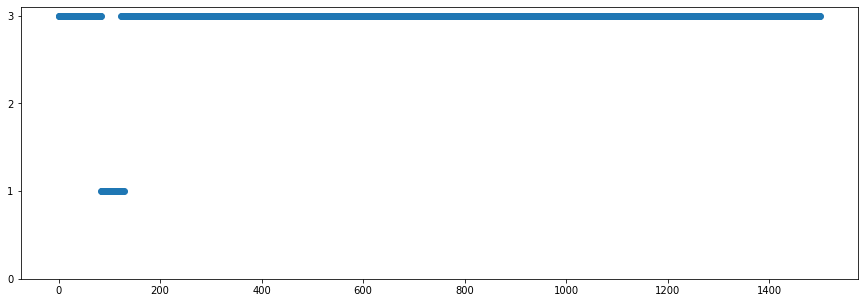

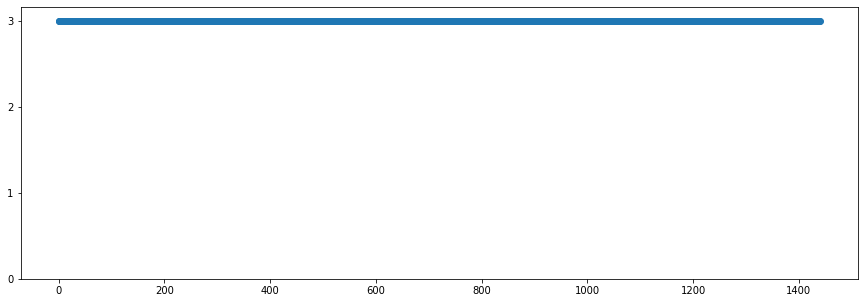

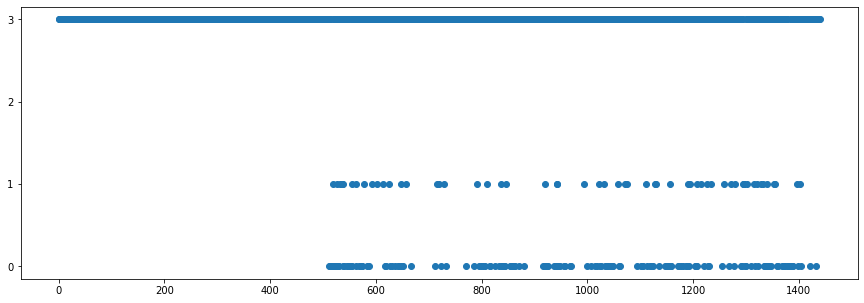

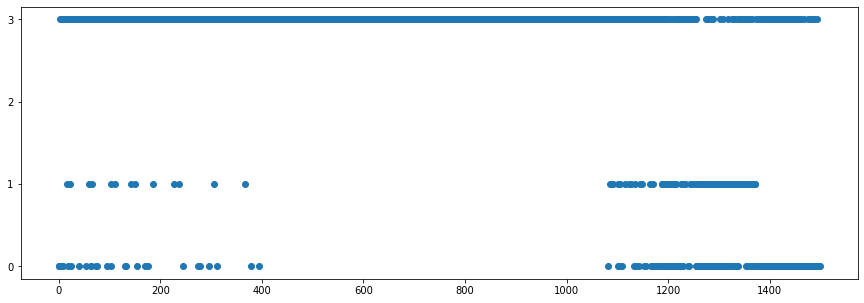

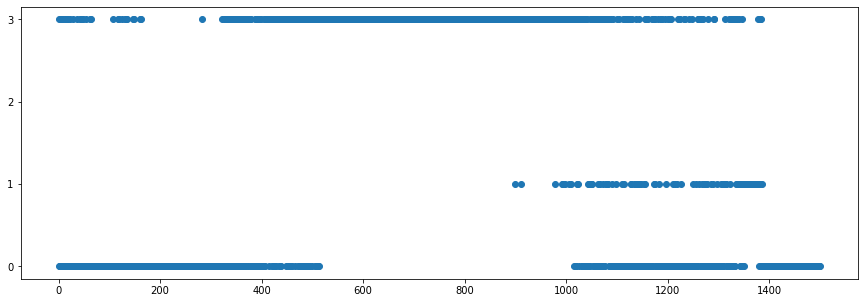

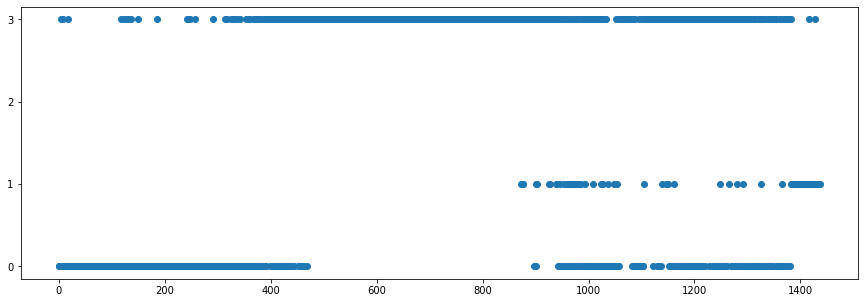

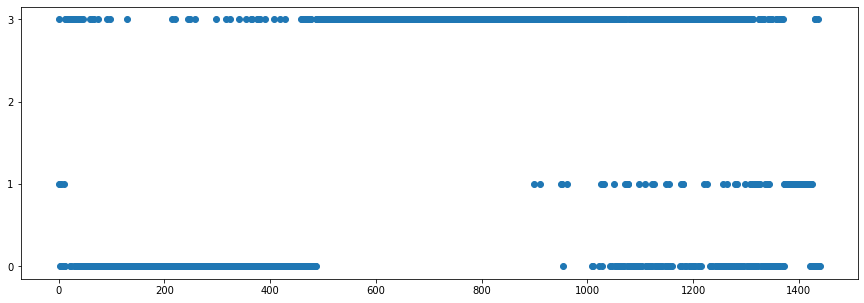

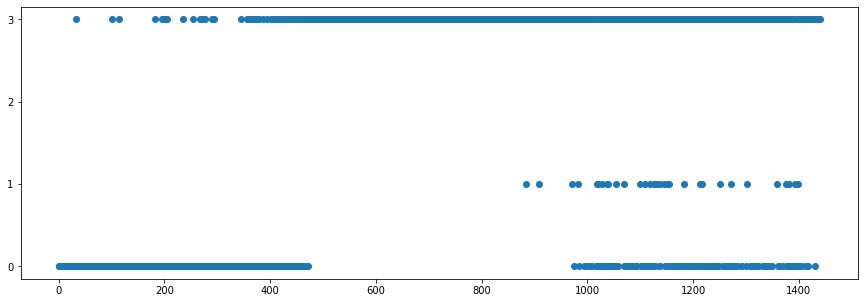

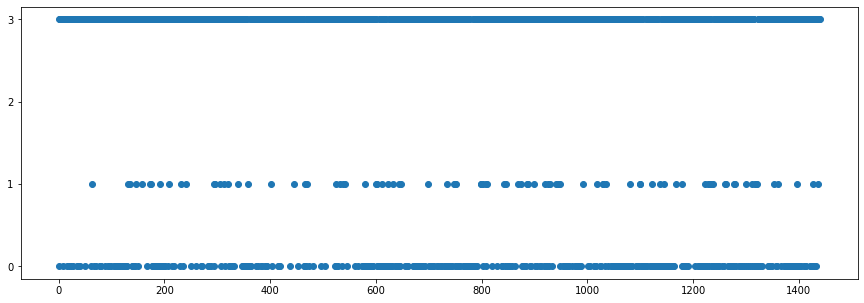

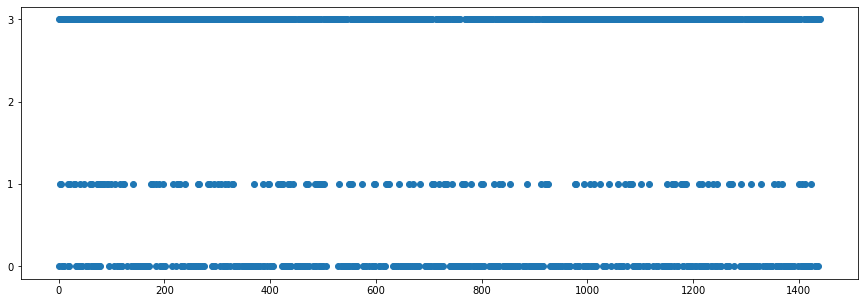

In [11]:
for i in range(len(file_list)):
    df_test_data = pd.read_csv(path+'\\'+file_list[i])
    df_test_data.head()
    X_test = df_test_data[['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std',
           'Z1_skew', 'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
           'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
           'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
           'spectrum_Kur','machine_Status_max', 'Temperature_avg', 'Current_avg',
           'Current_max']]
    xgb_pred = xgbClf.predict(X_test)
    df_test_data['Mould_life'] = ''
    df_test_data['Mould_life'] = xgb_pred
    df_test_data.to_csv(SavePath+'\\'+'Pred_'+file_list[i])
    plt.figure(figsize=(15,5))
    #df_test_data['Mould_life'].plot(yticks=np.arange(0,4,1),marker = 'o')
    plt.yticks(np.arange(0, 4, 1))
    #plt.scatter(df_test_data.index,df_test_data['Mould_life'])
    df_test_data['Mould_life'].plot(yticks=[0,1,2,3],marker='o',linestyle='')
    plt.savefig(SavePath+'\\'+file_list[i]+'.png')
    plt.show()

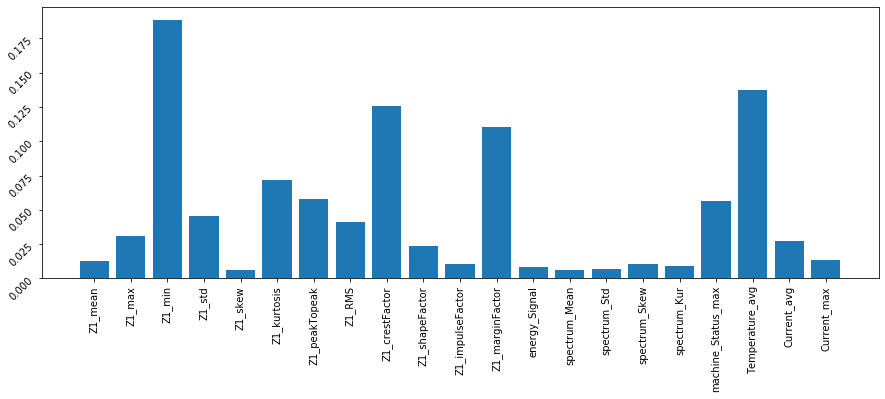

In [12]:
importance = xgbClf.feature_importances_
#plt.bar(range(len(importance)),importance)
plt.figure(figsize=(15,5))
imlist = []
for i in range(len(importance)):
    imlist.append(i)
list2 = []
for j in importance:
    list2.append(j)

xtick = ['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std',
           'Z1_skew', 'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
           'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
           'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
           'spectrum_Kur','machine_Status_max', 'Temperature_avg', 'Current_avg',
           'Current_max']
plt.bar(xtick,list2)
plt.yticks(rotation=45)
plt.xticks(rotation=90) 

plt.savefig(SavePath+'\\'+'Data_without_hand_importance'+'.png')
plt.show()